# Introducción 
Yandry Agustin Bermello Guadamud

El cambio climático y la variabilidad climática representan desafíos crecientes para las sociedades actuales. Comprender y analizar los datos climáticos de manera eficiente es fundamental para identificar tendencias, prever eventos extremos y apoyar la toma de decisiones informadas en sectores como la agricultura, la salud y la planificación urbana. Sin embargo, el manejo manual de grandes volúmenes de datos puede ser tedioso, propenso a errores y difícil de reproducir. Frente a este panorama, la automatización del análisis de datos climáticos se presenta como una herramienta clave para mejorar la eficiencia, la precisión y la escalabilidad del trabajo analítico.

**Proyecto:** *Automatización de Análisis y Visualización de Datos Climáticos*

**Objetivo:** Automatizar el proceso de carga, limpieza, análisis y visualización de un conjunto de datos climáticos utilizando bucles y funciones, con el fin de mejorar la eficiencia y la reproducibilidad del análisis de la información.


In [3]:
##cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os

# Carga y preparación de datos:

In [4]:
# Ruta al archivo CSV
ruta_csv = "Weather_Data 2.csv"

df= pd.read_csv(ruta_csv, parse_dates=["Date_Time"])

##Mostrar las primeras filas
print(df.head())


       Location           Date_Time  Temperature_C  Humidity_pct  \
0     San Diego 2024-01-14 21:12:00      10.683001     41.195754   
1     San Diego 2024-05-17 15:22:00       8.734140     58.319107   
2     San Diego 2024-05-11 09:30:00      11.632436     38.820175   
3  Philadelphia 2024-02-26 17:32:00      -8.628976     54.074474   
4   San Antonio 2024-04-29 13:23:00      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  


***¿Que columnas tiene la Data?***

In [10]:
print(list(df.columns))


['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']


***¿Tipo de Datos?***

In [37]:
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Location          14242 non-null  object        
 1   Date_Time         14242 non-null  datetime64[ns]
 2   Temperature_C     14242 non-null  float64       
 3   Humidity_pct      14242 non-null  float64       
 4   Precipitation_mm  14242 non-null  float64       
 5   Wind_Speed_kmh    14242 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 667.7+ KB


***¿Cuántos valores faltantes (NaN) hay en cada columna de tu DataFrame.?***

In [13]:
df.isna().sum()

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

In [14]:
##Saber cuántas filas duplicadas hay
df.duplicated().sum()

np.int64(0)

In [15]:
##Mostrar las filas duplicadas:
df[df.duplicated()]


,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh


In [16]:
##Para saber cuántos datos (valores no nulos) hay por columna en un DataFrame:
df.count()


Location            14242
Date_Time           14242
Temperature_C       14242
Humidity_pct        14242
Precipitation_mm    14242
Wind_Speed_kmh      14242
dtype: int64

**Los datos son bastante homogéneos pero se puede realizar una limpieza básica, eliminando duplicados y ajustando los tipos de datos cuando sea necesario.**

In [38]:

# Convertir 'Date_Time' a tipo datetime
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')

# Eliminar filas duplicadas
df = df.drop_duplicates()

# Convertir columnas numéricas
columnas_numericas = ['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar tipos de datos
print(df.dtypes)

# Mostrar primeras filas del DataFrame limpio
print(df.head())

Location                    object
Date_Time           datetime64[ns]
Temperature_C              float64
Humidity_pct               float64
Precipitation_mm           float64
Wind_Speed_kmh             float64
dtype: object
       Location           Date_Time  Temperature_C  Humidity_pct  \
0     san diego 2024-01-14 21:12:00      10.683001     41.195754   
1     san diego 2024-05-17 15:22:00       8.734140     58.319107   
2     san diego 2024-05-11 09:30:00      11.632436     38.820175   
3  philadelphia 2024-02-26 17:32:00      -8.628976     54.074474   
4   san antonio 2024-04-29 13:23:00      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  


In [39]:
df.dtypes

Location                    object
Date_Time           datetime64[ns]
Temperature_C              float64
Humidity_pct               float64
Precipitation_mm           float64
Wind_Speed_kmh             float64
dtype: object

In [40]:
df.isna().sum()

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

# Resumen estadístico de las variables numéricas


In [13]:
resumen_estadistico = df.describe()

# Mostrar resumen
print("Resumen estadístico de las variables numéricas:")
print(resumen_estadistico)


Resumen estadístico de las variables numéricas:
                           Date_Time   Temperature_C    Humidity_pct  \
count                        1000000  1000000.000000  1000000.000000   
mean   2024-03-10 10:40:29.383980544       14.779705       60.021830   
min              2024-01-01 00:00:00      -19.969311       30.000009   
25%              2024-02-04 16:28:00        2.269631       45.008500   
50%              2024-03-10 11:43:00       14.778002       60.018708   
75%              2024-04-14 03:51:00       27.270489       75.043818   
max              2024-05-18 19:44:00       39.999801       89.999977   
std                              NaN       14.482558       17.324022   

       Precipitation_mm  Wind_Speed_kmh  
count    1000000.000000  1000000.000000  
mean           5.109639       14.997598  
min            0.000009        0.000051  
25%            2.580694        7.490101  
50%            5.109917       14.993777  
75%            7.613750       22.514110  
max      

# Automatización del Análisis Exploratorio de Datos (EDA):


***1. Mes con la temperatura promedio más alta***

In [43]:

# Extraer el mes
df['Mes'] = df['Date_Time'].dt.month

# Calcular la temperatura promedio por mes
temp_prom_mensual = df.groupby('Mes')['Temperature_C'].mean()

# Encontrar el mes con la temperatura más alta
mes_max_temp = temp_prom_mensual.idxmax()
valor_max_temp = temp_prom_mensual.max()

print(f" El mes con la temperatura promedio más alta es el {mes_max_temp} con {valor_max_temp:.2f} °C.")


 El mes con la temperatura promedio más alta es el 3 con 15.21 °C.


***2. Año con más precipitaciones***

In [22]:

# Extraer el año
df['Año'] = df['Date_Time'].dt.year

# Sumar precipitaciones por año
precip_por_anio = df.groupby('Año')['Precipitation_mm'].sum()

# Encontrar el año con más precipitación acumulada
anio_max_precip = precip_por_anio.idxmax()
valor_max_precip = precip_por_anio.max()

print(f" El año con mayor precipitación fue {anio_max_precip} con un total de {valor_max_precip:.2f} mm.")

 El año con mayor precipitación fue 2024 con un total de 5109639.13 mm.


***3. Ciudad con las velocidades de viento más altas****

In [23]:
# Calcular la velocidad promedio del viento por ciudad
viento_prom_ciudad = df.groupby('Location')['Wind_Speed_kmh'].mean()

# Encontrar la ciudad con la mayor velocidad promedio
ciudad_max_viento = viento_prom_ciudad.idxmax()
valor_max_viento = viento_prom_ciudad.max()

print(f"La ciudad con mayor velocidad promedio del viento es {ciudad_max_viento} con {valor_max_viento:.2f} km/h.")


La ciudad con mayor velocidad promedio del viento es San Diego con 15.04 km/h.


***4. Calcular la sensacion termica***

In [61]:

  
#Calcula la sensación térmica (índice de calor) en °C a partir de la temperatura en °C y la humedad relativa (%).
#El índice de calor (Heat Index) oficial del Servicio Meteorológico Nacional de EE.UU. (NWS) se calcula en grados Fahrenheit con la siguiente fórmula polinómica de regresión:
    # Convertir a Fahrenheit
def calcular_sensacion_termica(temp_c, humedad):    
    temp_f = temp_c * 9/5 + 32

    # Fórmula del índice de calor (NWS)
    hi_f = (
        -42.379 + 2.04901523 * temp_f + 10.14333127 * humedad
        - 0.22475541 * temp_f * humedad
        - 6.83783e-3 * temp_f ** 2
        - 5.481717e-2 * humedad ** 2
        + 1.22874e-3 * temp_f ** 2 * humedad
        + 8.5282e-4 * temp_f * humedad ** 2
        - 1.99e-6 * temp_f ** 2 * humedad ** 2
    )

    # Convertir de nuevo a °C
    hi_c = (hi_f - 32) * 5/9

    return hi_c

# Aplicar la función al DataFrame
df['Sensation_Termica_C'] = df.apply(
    lambda row: calcular_sensacion_termica(row['Temperature_C'], row['Humidity_pct']),
    axis=1
)

# Mostrar las primeras filas con la nueva columna
print(df.head())


       Location           Date_Time  Temperature_C  Humidity_pct  \
0     San Diego 2024-01-14 21:12:00      10.683001     41.195754   
1     San Diego 2024-05-17 15:22:00       8.734140     58.319107   
2     San Diego 2024-05-11 09:30:00      11.632436     38.820175   
3  Philadelphia 2024-02-26 17:32:00      -8.628976     54.074474   
4   San Antonio 2024-04-29 13:23:00      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh dia_semana  Sensation_Termica_C  
0          4.020119        8.233540    domingo            34.041529  
1          9.111623       27.715161    viernes            40.903865  
2          4.607511       28.732951     sábado            31.947747  
3          3.183720       26.367303      lunes           112.822628  
4          9.598282       29.898622      lunes            73.836010  


***Agrupar por localidad y calcular la temperatura promedio (Observación los valores se promedian con negativos y da como resultados un positivo)***

In [62]:
temp_prom_por_localidad = df.groupby('Location')['Temperature_C'].mean()

# Encontrar la localidad con la temperatura promedio más baja
localidad_mas_fria = temp_prom_por_localidad.idxmin()
temp_min_promedio = temp_prom_por_localidad.min()

print(f"La localidad con la temperatura promedio más baja es '{localidad_mas_fria}' con {temp_min_promedio:.2f} °C.")


La localidad con la temperatura promedio más baja es 'Phoenix' con 12.54 °C.


***Contar cuántos valores negativos hay en 'Temperature_C'***

In [63]:
## Contar cuántos valores de Temperature_C son menores que 0
num_negativos = (df['Temperature_C'] < 0).sum()

print(f"Número de valores negativos en Temperature_C: {num_negativos}")

# Opcional: mostrar algunas filas con temperatura negativa
print(df[df['Temperature_C'] < 0].head())


Número de valores negativos en Temperature_C: 2949
        Location           Date_Time  Temperature_C  Humidity_pct  \
3   Philadelphia 2024-02-26 17:32:00      -8.628976     54.074474   
7       New York 2024-01-25 19:04:00      -6.894766     30.804894   
9       San Jose 2024-05-18 09:14:00      -1.607088     82.198701   
21      New York 2024-02-19 12:26:00      -7.383811     54.089973   
24       Houston 2024-01-11 02:53:00      -5.236300     58.054296   

    Precipitation_mm  Wind_Speed_kmh dia_semana  Sensation_Termica_C  
3           3.183720       26.367303      lunes           112.822628  
7           8.027624       16.848337     jueves            65.337304  
9           4.101493       25.647282     sábado            81.674760  
21          1.905731        6.637064      lunes           105.719809  
24          4.072880       24.754053     jueves            97.650785  


In [12]:
# Filtrar solo temperaturas negativas y obtener la mínima
temp_min_negativa = df.loc[df['Temperature_C'] < 0, 'Temperature_C'].min()

print(f"El valor negativo más bajo de temperatura es: {temp_min_negativa:.2f} °C")


El valor negativo más bajo de temperatura es: -19.70 °C


***Valor mínimo negativo conocido y nombre de la locación con la temperatura mas baja***

In [78]:
# Valor mínimo negativo conocido
temp_min_negativa = -19.97

# Buscar filas con esa temperatura exacta (o muy cercana para evitar decimales  
fila_min_temp = df[df['Temperature_C'].round(2) == temp_min_negativa]

print(f"La localidad con la temperatura mínima de {temp_min_negativa}")


La localidad con la temperatura mínima de -19.97


In [29]:
# Filtrar el registro de Phoenix con temperatura mínima
registro = df[(df['Location'] == 'Phoenix') & (df['Temperature_C'].round(2) == -19.97)]

# Mostrar las fechas en que ocurrió
fechas = registro['Date_Time'].unique()

print(f"La temperatura mínima de -19.97 °C en Phoenix se registró en las fechas:")
for fecha in fechas:
    print(fecha)


La temperatura mínima de -19.97 °C en Phoenix se registró en las fechas:
2024-01-12 20:20:00


# Grafico de las variables meteorológicas en función del tiempo

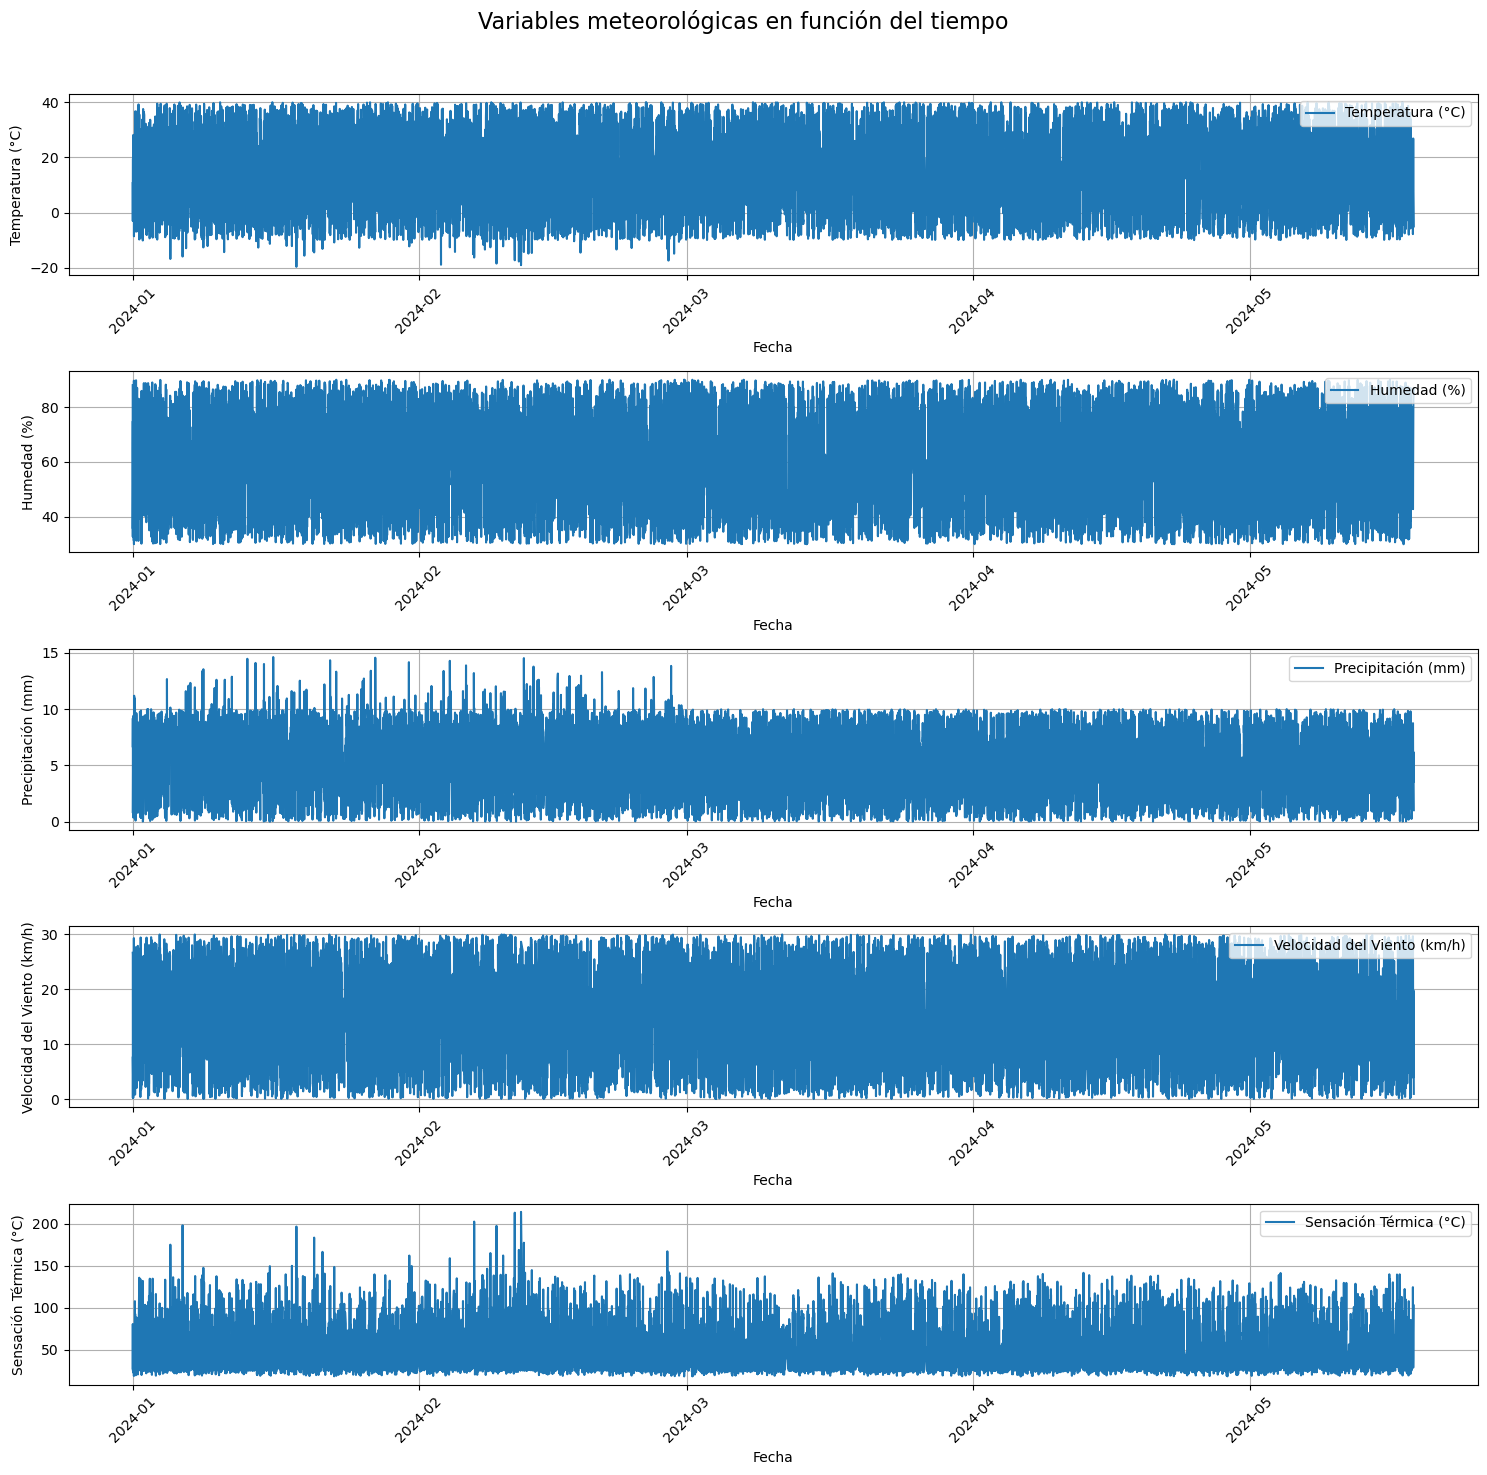

In [64]:
# Tomar muestra para no saturar el gráfico
df_sample = df.sample(n=10000, random_state=42).sort_values('Date_Time')

# Variables originales y sus nombres en español
variables = ['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh', 'Sensation_Termica_C']
nombres_es = ['Temperatura (°C)', 'Humedad (%)', 'Precipitación (mm)', 'Velocidad del Viento (km/h)', 'Sensación Térmica (°C)']

fig, axs = plt.subplots(len(variables), 1, figsize=(15, 15)) 

for i, var in enumerate(variables):
    axs[i].plot(df_sample['Date_Time'], df_sample[var], label=nombres_es[i], color='tab:blue')
    axs[i].set_ylabel(nombres_es[i])
    axs[i].legend(loc='upper right')
    axs[i].grid(True)
    axs[i].set_xlabel('Fecha')           # Mostrar etiqueta X en todas las gráficas
    axs[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas de fecha

plt.suptitle('Variables meteorológicas en función del tiempo', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Guardar la figura
plt.savefig('variables_meteorologicas_tiempo.png', dpi=300, bbox_inches='tight')

plt.show()


# Graficos Boxplot con las variables meteorológicas 

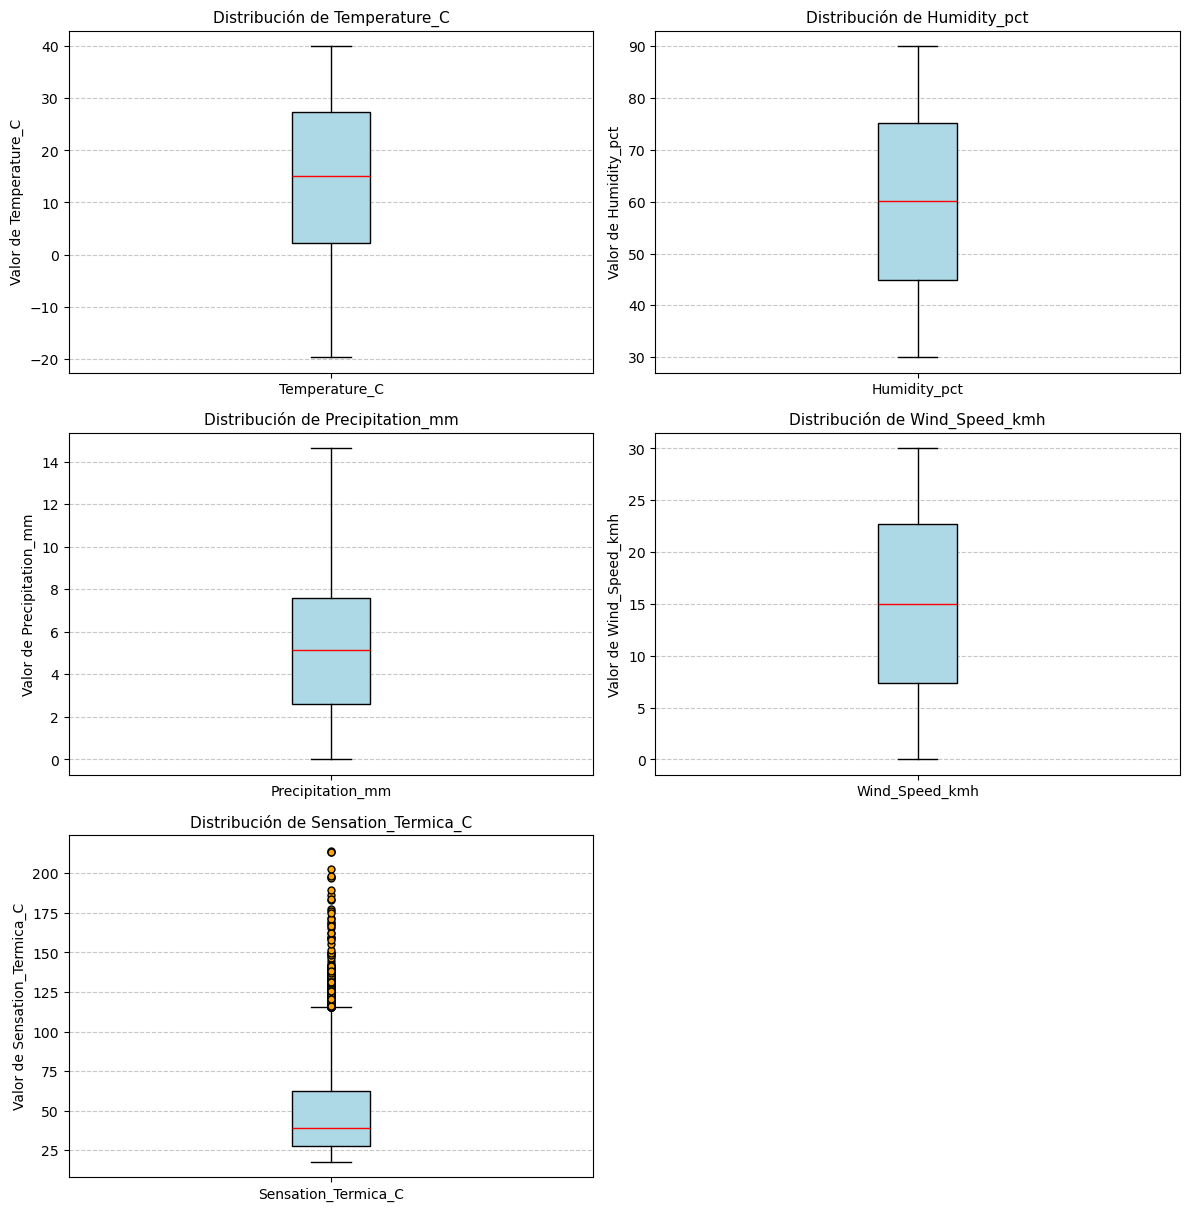

In [60]:

import pandas as pd
import matplotlib.pyplot as plt

# Limpiar espacios en nombres de columnas
df.columns = df.columns.str.strip()

# Seleccionar columnas numéricas automáticamente
columnas_numericas = df.select_dtypes(include='number').columns.tolist()

# Convertir columnas a valores numéricos por si hay errores de formato
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Crear figura y ejes para 4x2 boxplots (ajusta según el número de columnas)
filas = 4
columnas = 2
fig, axs = plt.subplots(filas, columnas, figsize=(12, 16))
axs = axs.flatten()

# Graficar los boxplots
for i, col in enumerate(columnas_numericas[:filas * columnas]):
    axs[i].boxplot(
        df[col].dropna(), vert=True, patch_artist=True,
        boxprops=dict(facecolor="lightblue"),
        medianprops=dict(color="red"),
        flierprops=dict(marker="o", markerfacecolor="orange", markersize=5)
    )
    axs[i].set_title(f'Distribución de {col}', fontsize=11)
    axs[i].set_ylabel(f'Valor de {col}')
    axs[i].set_xticks([1])
    axs[i].set_xticklabels([col])
    axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)

# Si hay más gráficos que ejes, ocultar los sobrantes
for j in range(i + 1, filas * columnas):
    axs[j].set_visible(False)

plt.tight_layout()

# Guardar la figura como imagen
plt.savefig("boxplots_variables_numericas.png", dpi=300)
plt.show()


# Frecuencia semanal de los datos climaticos

In [69]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Mapear día de la semana manualmente
dias = {0: "lunes", 1: "martes", 2: "miércoles", 3: "jueves", 4: "viernes", 5: "sábado", 6: "domingo"}
df['dia_semana'] = df['Date_Time'].dt.weekday.map(dias)
df['dia_semana'] = pd.Categorical(df['dia_semana'],
                                   categories=["lunes", "martes", "miércoles", "jueves", "viernes", "sábado", "domingo"],
                                   ordered=True)

# Variables numéricas a analizar
variables_numericas = {
    'Temperature_C': "Temperatura (°C)",
    'Humidity_pct': "Humedad relativa (%)",
    'Precipitation_mm': "Precipitación (mm)",
    'Wind_Speed_kmh': "Velocidad del viento (km/h)"
}

In [70]:
# Reorganizar en formato largo (long format)
df_long = df.melt(id_vars=['Location', 'Date_Time', 'dia_semana'],
                  value_vars=list(variables_numericas.keys()),
                  var_name='variable', value_name='valor')

# Reemplazar nombres con etiquetas en español
df_long['variable'] = df_long['variable'].map(variables_numericas)

# Crear subplots (2 filas x 2 columnas)
fig = make_subplots(rows=2, cols=2, subplot_titles=list(variables_numericas.values()))

In [71]:
# Insertar cada variable en su subplot correspondiente
for i, var in enumerate(variables_numericas.values()):
    row = i // 2 + 1
    col = i % 2 + 1
    data_var = df_long[df_long['variable'] == var]
    
    fig.add_trace(
        go.Box(
            x=data_var['dia_semana'],
            y=data_var['valor'],
            name=var,
            boxpoints='outliers',
            marker=dict(color='blue'),
            showlegend=False
        ),
        row=row, col=col
    )

In [72]:
# Configurar el diseño general
fig.update_layout(
    height=700,
    width=1000,
    title_text="Estacionalidad semanal de variables meteorológicas",
    title_x=0.5
)
fig.write_html("boxplots_meteorologicos.html")
import webbrowser
webbrowser.open("boxplots_meteorologicos.html")

True